# Setup

## Libraries

In [16]:
# Regex

import re

# Date and time

import time as t
import datetime as dt

# Data Analysis

import numpy as np
import pandas as pd

# Visualization

import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

# Warnings

import warnings
warnings.filterwarnings("ignore")

## Pandas Settings

In [17]:
# Settings selected

pd.set_option('display.width', 1000)                  # Max width of each column
pd.set_option('display.max_rows', 500)                # Max number of rows displayed
pd.set_option("display.max_columns", None)            # Max number of columns displayed
pd.set_option('display.max_colwidth', 500)            # Max number of character displayed in column
pd.set_option('display.precision', 2)                 # Number of decimal float columns display
pd.set_option('display.float_format',  '{:,}'.format) # Show big numbers 
pd.set_option('display.colheader_justify', 'center')  # Justification of header

## Scikit Learn

In [18]:
# Scikitlearn

from sklearn import datasets

# Train and test split 

from sklearn.model_selection import train_test_split

# Algorithm

from sklearn.tree import DecisionTreeClassifier

# Metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Import

In [23]:
# Check information about breast cancer dataset

print(datasets.load_breast_cancer().DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [19]:
# Load dataset breast cancer

X, y = datasets.load_breast_cancer(return_X_y = True, as_frame = True)

print(type(X), X.shape)
print(type(y), y.shape)

<class 'pandas.core.frame.DataFrame'> (569, 30)
<class 'pandas.core.series.Series'> (569,)


# Transform

In [20]:
# Check columns type and null values

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# Modeling

In [21]:
# Split into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a classifier

model = DecisionTreeClassifier()

# Fit the classifier whith training dataset

model.fit(X_train, y_train)

# Create the precdition for test dataset

y_pred = model.predict(X_test)

# Cofunsion Matrix

## Table

In [24]:
# Create dataframe to comparer predict and real results

df_result = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred)], axis=1)

df_result.columns = ['target_real','target_predict']

df_result['predction_result'] = df_result.target_real == df_result.target_predict

df_result['aux'] = df_result.target_real.astype(str) + '-' + df_result.target_predict.astype(str)

result_dic_1 = {
    '0-0' : 'TN',
    '1-1' : 'TP',
    '0-1' : 'FP',
    '1-0' : 'FN'
}

result_dic_2 = {
    '0-0' : 'TRUE NEGATIVE',
    '1-1' : 'TRUE POSITIVE',
    '0-1' : 'FALSE POSITIVE',
    '1-0' : 'FALSE NEGATIVE'
}

df_result['confusion_matrix_cod'] = df_result.aux.replace(result_dic_1)
df_result['confusion_matrix_desc'] = df_result.aux.replace(result_dic_2)

df_result = df_result.drop(['aux'], axis=1)

df_result.head()

,target_real,target_predict,predction_result,confusion_matrix_cod,confusion_matrix_desc
0,0,0,True,TN,TRUE NEGATIVE
1,1,1,True,TP,TRUE POSITIVE
2,0,0,True,TN,TRUE NEGATIVE
3,1,1,True,TP,TRUE POSITIVE
4,0,0,True,TN,TRUE NEGATIVE


In [25]:
# Count manually the confusion matrix

df_result.confusion_matrix_cod.value_counts()

TP    64
TN    40
FN     8
FP     2
Name: confusion_matrix_cod, dtype: int64

In [26]:
# Calcule manually each score

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
matthews = matthews_corrcoef(y_test,y_pred)

dic_decision_tree = {'DecisionTreeClassifier' : [accuracy,precision,recall,f1,matthews]}

# Print the results
print(f"Model : DecisionTreeClassifier")
print(f"Accuracy Score: \t{accuracy:.0%}")
print(f"Precision Score: \t{precision:.0%}")
print(f"Recall Score: \t\t{recall:.0%}")
print(f"F1 Score: \t\t{f1:.0%}")
print(f"Matthews Correlation: \t{matthews:.0%}")

Model : DecisionTreeClassifier
Accuracy Score: 	91%
Precision Score: 	97%
Recall Score: 		89%
F1 Score: 		93%
Matthews Correlation: 	82%


## Matrix

In [27]:
# Create confusion matrix

data = confusion_matrix(y_test, y_pred, labels=[1,0])

data

array([[64,  8],
       [ 2, 40]], dtype=int64)

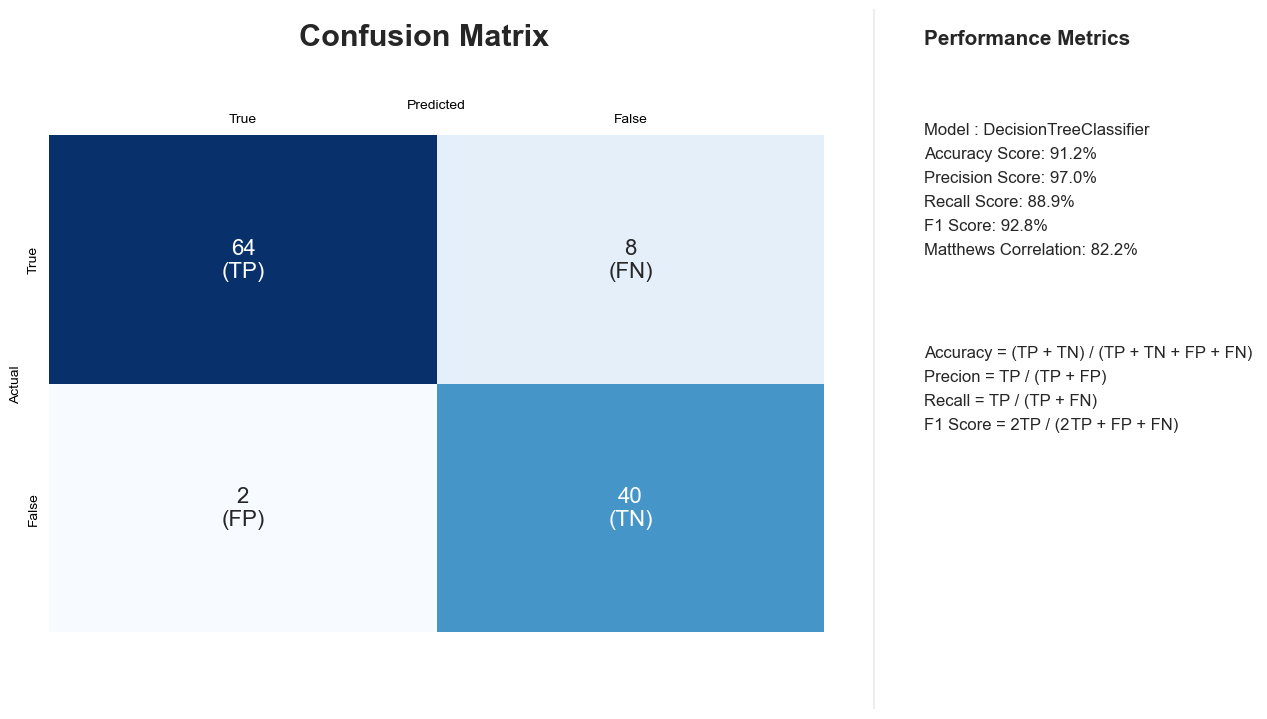

In [28]:
# Create dataframe from Confusion Matrix

df_cm = pd.DataFrame(data, columns=['True','False'], index = ['True','False'])

df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

# Concact labels information

cf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])

group_names = ['(TP)','(FN)','(FP)','(TN)']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]

group_percentages = ['{0:.1%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_counts,group_names)]

labels = np.asarray(labels).reshape(2,2)

# Color map for Heatmap

cm = np.array([[2547, 288], [255, 216]])

# Create plot with absolute values

fig, ax = plt.subplots(figsize = (10,7))

sns.set(font_scale=1.4)
sns.heatmap(
    df_cm,
    cmap = 'Blues',
    # cmap=sns.color_palette(['tomato', 'palegreen'], as_cmap=True),
    annot=labels,
    fmt='',
    annot_kws={"size": 16},
    cbar=False
    )

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.tick_params(left = False, top = False, bottom=False, right=False)

plt.subplots_adjust(top=0.82)

fig.suptitle('Confusion Matrix', fontsize=22, fontweight='bold')

# Add Insight section

fig.text(1, 0.95, 'Performance Metrics', fontsize=15, fontweight='bold')

text_comment = (f"Model : DecisionTreeClassifier \nAccuracy Score: {accuracy:.1%} \nPrecision Score: {precision:.1%} \nRecall Score: {recall:.1%} \nF1 Score: {f1:.1%} \nMatthews Correlation: {matthews:.1%}")

text_theory = 'Accuracy = (TP + TN) / (TP + TN + FP + FN) \nPrecion = TP / (TP + FP) \nRecall = TP / (TP + FN) \nF1 Score = 2TP / (2 TP + FP + FN)'

fig.text(1, 0.65, text_comment,fontsize=12, fontweight='light', linespacing=1.75)
fig.text(1, 0.4, text_theory,fontsize=12, fontweight='light', linespacing=1.75)


import matplotlib.lines as lines

l1 = lines.Line2D([0.95, 0.95], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.1)

fig.lines.extend([l1])

#plt.tight_layout()

plt.show()